In [1]:
# Importing all the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # ignore CPU instructions warning
from google.colab import files

#----------------------------------------------- Data manipulation ---------------------------------------------

from google.colab import files #importing files on google colab.We first need to upload the dataset
uploaded = files.upload()




Saving Paraparaumu_Aero_Hourly_Imputed.csv to Paraparaumu_Aero_Hourly_Imputed.csv


<Figure size 640x480 with 0 Axes>

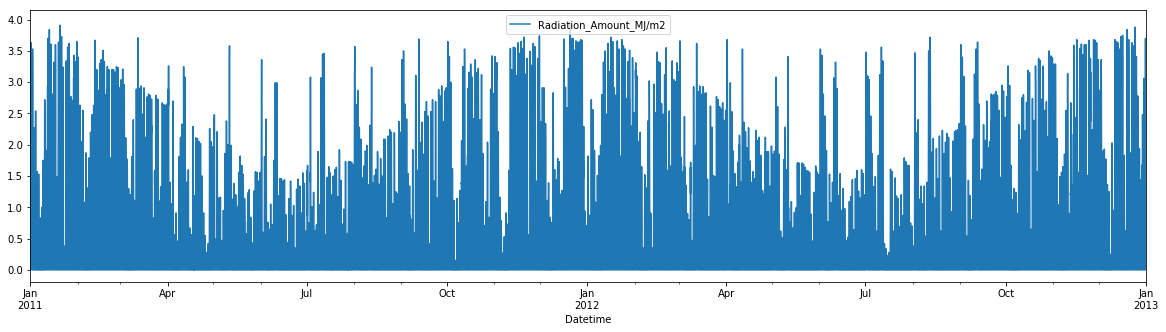

In [3]:
import io
import_data = pd.read_csv(io.BytesIO(uploaded['Paraparaumu_Aero_Hourly_Imputed.csv']),na_values=('-'))#reading the dataset
import_data['Datetime']=pd.to_datetime(import_data.Datetime)
data=import_data

#Data Visualization
data.plot(x='Datetime', y='Radiation_Amount_MJ/m2',figsize=(20,5))
# plt.savefig('First_plot.png', dpi=1000)
# files.download('First_plot.png')  



In [4]:
#Checking if there are any NaNs in the Pre-processed dataset
data.isna().sum()

Datetime                  0
WDir_DegT                 0
WSpeed_m/s                0
GustDir_DegT              0
GustSpeed_m/s             0
Rain_Amount_mm            0
Tair_C                    0
Twet_C                    0
RH_%                      0
Tdew_C                    0
Tmax_C                    0
Tmin_C                    0
Tgmin_C                   0
Pmsl_hPa                  0
Pstn_hPa                  0
Sun_Hrs                   0
Radiation_Amount_MJ/m2    0
dtype: int64

In [5]:
#Converting Date-time objects to float/int objects to apply panadas functions 
data['Datetime']=pd.to_datetime(data.Datetime)
data['Datetime']=pd.to_numeric(data.Datetime)
data['WDir_DegT']=pd.to_numeric(data.WDir_DegT)
data.dtypes

Datetime                    int64
WDir_DegT                 float64
WSpeed_m/s                float64
GustDir_DegT              float64
GustSpeed_m/s             float64
Rain_Amount_mm            float64
Tair_C                    float64
Twet_C                    float64
RH_%                      float64
Tdew_C                    float64
Tmax_C                    float64
Tmin_C                    float64
Tgmin_C                   float64
Pmsl_hPa                  float64
Pstn_hPa                  float64
Sun_Hrs                   float64
Radiation_Amount_MJ/m2    float64
dtype: object

In [6]:
#Data standardization
standardized_data=data/data.max()
standardized_data.corr()


,Datetime,WDir_DegT,WSpeed_m/s,GustDir_DegT,GustSpeed_m/s,Rain_Amount_mm,Tair_C,Twet_C,RH_%,Tdew_C,Tmax_C,Tmin_C,Tgmin_C,Pmsl_hPa,Pstn_hPa,Sun_Hrs,Radiation_Amount_MJ/m2
Datetime,1.000000,0.046709,-0.002714,0.049431,-0.007206,-0.004459,-0.106821,-0.136452,-0.104772,-0.159712,-0.105849,-0.108035,-0.030681,-0.010932,-0.009066,0.010826,0.020271
WDir_DegT,0.046709,1.000000,0.176655,0.729258,0.274201,-0.010286,0.094937,0.033170,-0.257392,-0.038628,0.094169,0.100857,0.141188,-0.203303,-0.203176,0.123514,0.151519
WSpeed_m/s,-0.002714,0.176655,1.000000,0.177417,0.947310,0.069101,0.348443,0.292231,-0.293972,0.200589,0.330903,0.367875,0.315596,-0.357074,-0.355758,0.100100,0.196801
GustDir_DegT,0.049431,0.729258,0.177417,1.000000,0.279284,-0.012105,0.086078,0.028648,-0.240340,-0.038508,0.088143,0.094763,0.129988,-0.217750,-0.217795,0.112822,0.131291
GustSpeed_m/s,-0.007206,0.274201,0.947310,0.279284,1.000000,0.091982,0.298804,0.236031,-0.315572,0.139594,0.283756,0.315467,0.255852,-0.395698,-0.394781,0.063370,0.144724
Rain_Amount_mm,-0.004459,-0.010286,0.069101,-0.012105,0.091982,1.000000,0.021609,0.076883,0.199602,0.123457,0.023692,0.030299,-0.002027,-0.174339,-0.174324,-0.117872,-0.096106
Tair_C,-0.106821,0.094937,0.348443,0.086078,0.298804,0.021609,1.000000,0.965513,-0.265111,0.853937,0.989580,0.985493,0.873458,-0.147237,-0.143263,0.363400,0.478392
Twet_C,-0.136452,0.033170,0.292231,0.028648,0.236031,0.076883,0.965513,1.000000,-0.008768,0.958598,0.951652,0.953964,0.791907,-0.172287,-0.168424,0.221672,0.339199
RH_%,-0.104772,-0.257392,-0.293972,-0.240340,-0.315572,0.199602,-0.265111,-0.008768,1.000000,0.272150,-0.275047,-0.255357,-0.402302,-0.049197,-0.050099,-0.548673,-0.540497
Tdew_C,-0.159712,-0.038628,0.200589,-0.038508,0.139594,0.123457,0.853937,0.958598,0.272150,1.000000,0.838268,0.845411,0.649185,-0.177659,-0.174222,0.060480,0.176884


In [0]:
#Train-Test Split
from sklearn.model_selection import train_test_split #using the normal train test split
train_set, test_set = train_test_split(standardized_data, test_size=0.2, random_state=42)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f289a65acf8>,
      dtype=object)

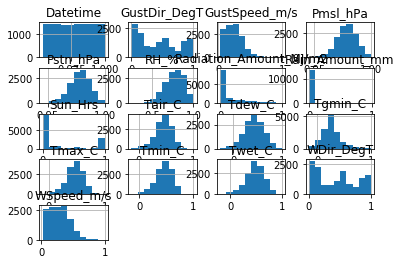

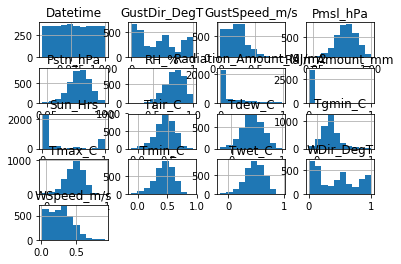

In [8]:
#Train Test visualization
train_set.hist()
test_set.hist()

In [0]:
#Separating the target variables from the actual dataset
strat_train_labels = train_set.pop('Radiation_Amount_MJ/m2')
strat_test_labels = test_set.pop('Radiation_Amount_MJ/m2')

In [0]:
#------------ Define the neural network model --------------
def build_model():
    model = keras.Sequential([
        tf.keras.layers.Dense(17, activation=tf.nn.relu, input_shape=[len(train_set.keys())]),   # input layer
        tf.keras.layers.Dense(10, activation=tf.nn.relu),
#         tf.keras.layers.Dense(150, activation=tf.nn.relu),
#         tf.keras.layers.Dense(150, activation=tf.nn.relu),
#         tf.keras.layers.Dense(75, activation=tf.nn.relu),
#         tf.keras.layers.Dense(75, activation=tf.nn.relu),
        tf.keras.layers.Dense(5, activation=tf.nn.relu),
        tf.keras.layers.Dense(1)     # output layer (only 1 value output)
    ])

    optimizer = tf.keras.optimizers.Adamax(0.01)  # implements the Adamax algorithm (learning rate of 0.001)

    # compile(optimizer, loss, metrics)
    # loss = https://keras.io/losses/ - use existing mean squared error function (y_true, y_pred)
    # optimizer = optimizer instance
    # metrics = metrics to evaluate during training and testing (MAE, MSE)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error', 'mean_squared_error','acc'])
    return model


In [11]:
# build the model
model = build_model()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 17)                289       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                180       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 530
Trainable params: 530
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Initial Example batch to verify if the model is working or not
example_batch = train_set[:10] # grab first 10 samples from the normalised training_data set
example_result = model.predict(example_batch)   # use the example batch to make a prediction
print(example_result)


[[0.19368872]
 [0.64793646]
 [0.5972979 ]
 [0.3245788 ]
 [0.7055692 ]
 [0.3265278 ]
 [0.7055816 ]
 [0.7625637 ]
 [0.31709713]
 [0.40841818]]


In [0]:
#----------------------------------------------- Train the neural network ---------------------------------------------
# Early stop parameters
# Stop training when a monitored quantity has stopped improving
# monitor = quantity to be monitored
# patience = number of epochs with no improvement after which training will be stopped
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='auto')

# Function to Display * after every epoch is completed

class PrintDot(keras.callbacks.Callback):
    # https://www.tensorflow.org/beta/guide/keras/custom_callback
    #
    def on_epoch_end(self, epoch, logs=None): 
      i=0
      if (epoch % 100 == 0):
            print('')
      print('*', end='')
        
 

In [15]:
# Trains the model for a given number of epochs (iterations on a dataset)
EPOCHS = 500


# model.fit(x, y, epochs, validation_split, verbose, callbacks)
# x = numpy array of training data, y = numpy array of target (label) data
# epochs = number of epochs to train the model
# validation_data = fraction of training data to be used as validation data
# callbacks = list of keras.callbacks.Callback instances; list of callbacks to apply during training/validation
history = model.fit(train_set, strat_train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0,
                     callbacks=[early_stop, PrintDot()])




**************************************

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


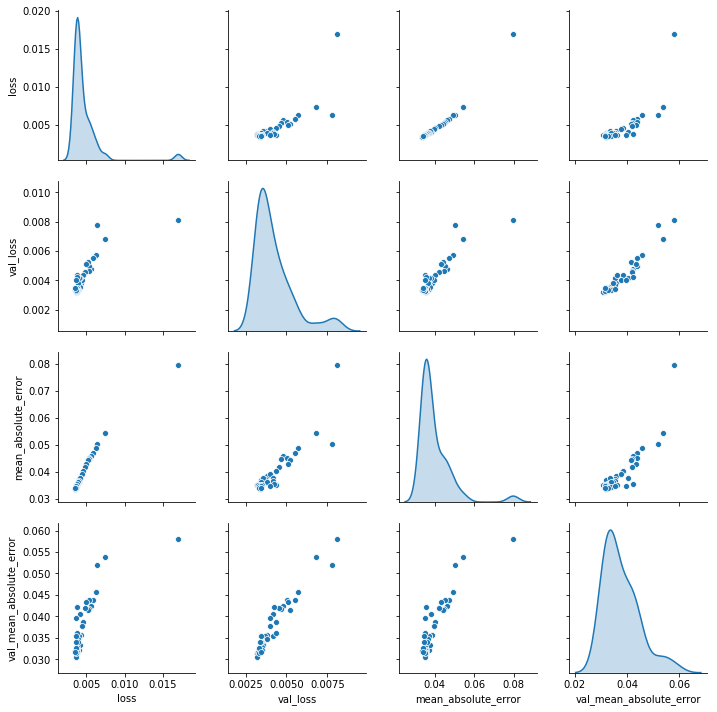

In [17]:
# Visualizing the losses
sns.pairplot(hist[["loss", "val_loss", "mean_absolute_error", "val_mean_absolute_error"]], diag_kind="kde")

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Radiation]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
#   plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
#            label = 'Val Error')
# plt.savefig('Corr_PredVTrue.png', dpi=1000)
# files.download('Corr_PredVTrue.png')
  plt.ylim([0,.25])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Radiation^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
#   plt.plot(hist['epoch'], hist['val_mean_squared_error'],
#            label = 'Val Error')
  plt.ylim([0,0.2])
  plt.legend()
  plt.show()


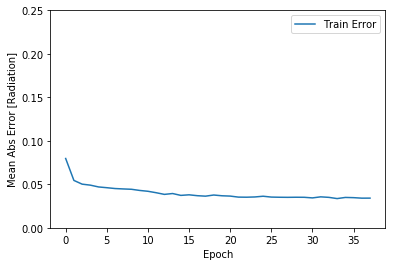

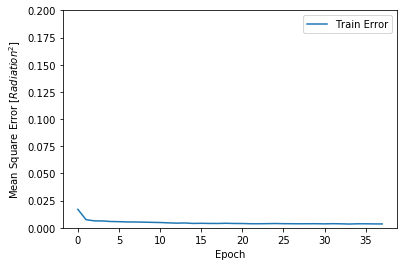

In [19]:
# Plotting train error vs epoch
plot_history(history)


Testing Mean Absolute Error of the Test data set: 0.03 


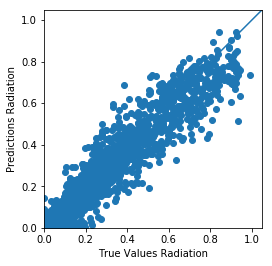

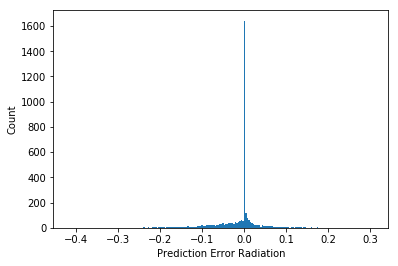

In [20]:
#--------------- Test the neural network ------------------
# evaluate how well model generalizes to new data by using the test set
loss, mae, mse, acc = model.evaluate(test_set, strat_test_labels, verbose=0)
print('')
print("Testing Mean Absolute Error of the Test data set: {:2.2f} ".format(mae))

test_predictions = model.predict(test_set).flatten()
train_predictions = model.predict(train_set).flatten()
# create a scatter plot of True Vs Predicted Values
plt.scatter(strat_test_labels, test_predictions)     

plt.xlabel('True Values Radiation')                 
plt.ylabel('Predictions Radiation')                 
plt.axis('equal')                               
plt.axis('square')                              
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
# plt.savefig('Corr_PredVTrue.png', dpi=1000)
# files.download('Corr_PredVTrue.png')
plt.show()

# create a histogram of the error distribution
error = test_predictions - strat_test_labels  
plt.hist(error, bins=200)                
plt.xlabel("Prediction Error Radiation")
_ = plt.ylabel("Count")
# plt.savefig('Prediction_Count.png', dpi=1000)
# files.download('Prediction_Count.png')  
plt.show()




In [21]:
test_set['Predicted_Radiation']=test_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
test_set['Actual_Radiation']=strat_test_labels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
# Converting the numeric object to date time object on test set  
data['Datetime'].max()
test_set['Datetime']=test_set.Datetime*data['Datetime'].max()
test_set['Datetime']=pd.to_datetime(test_set.Datetime)
test_set.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Datetime,WDir_DegT,WSpeed_m/s,GustDir_DegT,GustSpeed_m/s,Rain_Amount_mm,Tair_C,Twet_C,RH_%,Tdew_C,Tmax_C,Tmin_C,Tgmin_C,Pmsl_hPa,Pstn_hPa,Sun_Hrs,Predicted_Radiation,Actual_Radiation
101,2011-01-05 05:00:00,0.286111,0.174497,0.297222,0.11465,0.0,0.315068,0.37931,0.951,0.395349,0.356164,0.320285,0.073123,0.992578,0.992572,0.0,0.000345,0.0


In [24]:
train_set['Predicted_Radiation']=train_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
train_set['Actual_Radiation']=strat_train_labels


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
# Converting the numeric object to date time object on train set
train_set['Datetime']=train_set.Datetime*data['Datetime'].max()
train_set['Datetime']=pd.to_datetime(train_set.Datetime)
train_set.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Datetime,WDir_DegT,WSpeed_m/s,GustDir_DegT,GustSpeed_m/s,Rain_Amount_mm,Tair_C,Twet_C,RH_%,Tdew_C,Tmax_C,Tmin_C,Tgmin_C,Pmsl_hPa,Pstn_hPa,Sun_Hrs,Predicted_Radiation,Actual_Radiation
7861,2011-11-24 13:00:00,0.669444,0.275168,0.625,0.213376,0.0,0.592466,0.551724,0.566,0.4,0.592466,0.569395,0.577075,0.971952,0.972024,1.0,0.710823,0.868354


In [0]:
#Combining Training and Testing Set to measure the final accuracy
combinedTraintest=train_set.append(test_set,sort='True')
combinedTraintest=combinedTraintest.sort_index()

combinedTraintest['Actual_Radiation']=combinedTraintest['Actual_Radiation']*import_data['Radiation_Amount_MJ/m2'].max()


In [28]:
combinedTraintest['Predicted_Radiation']=combinedTraintest['Predicted_Radiation']*import_data['Radiation_Amount_MJ/m2'].max()
combinedTraintest.tail(1)

,Actual_Radiation,Datetime,GustDir_DegT,GustSpeed_m/s,Pmsl_hPa,Predicted_Radiation,Pstn_hPa,RH_%,Rain_Amount_mm,Sun_Hrs,Tair_C,Tdew_C,Tgmin_C,Tmax_C,Tmin_C,Twet_C,WDir_DegT,WSpeed_m/s
17544,0.0,2013-01-01,0.816667,0.426752,0.979084,0.011276,0.979356,0.75,0.0,0.0,0.55137,0.544186,0.300395,0.558219,0.572954,0.590517,0.813889,0.516779


In [29]:
combinedTraintest.max()

Actual_Radiation                      3.95
Datetime               2013-01-01 00:00:00
GustDir_DegT                             1
GustSpeed_m/s                            1
Pmsl_hPa                                 1
Predicted_Radiation                3.73593
Pstn_hPa                                 1
RH_%                                     1
Rain_Amount_mm                           1
Sun_Hrs                                  1
Tair_C                                   1
Tdew_C                                   1
Tgmin_C                                  1
Tmax_C                                   1
Tmin_C                                   1
Twet_C                                   1
WDir_DegT                                1
WSpeed_m/s                               1
dtype: object

In [30]:
# Visualization of the Predicted vs True Values Vs Date and Time
tmep=combinedTraintest.Datetime.loc[5615:5640]
print(tmep.shape)
temp1=combinedTraintest.Actual_Radiation.loc[5615:5640]
print(temp1.shape)
temp=combinedTraintest.Predicted_Radiation.loc[5615:5640]
print(temp.shape)

(26,)
(26,)
(26,)


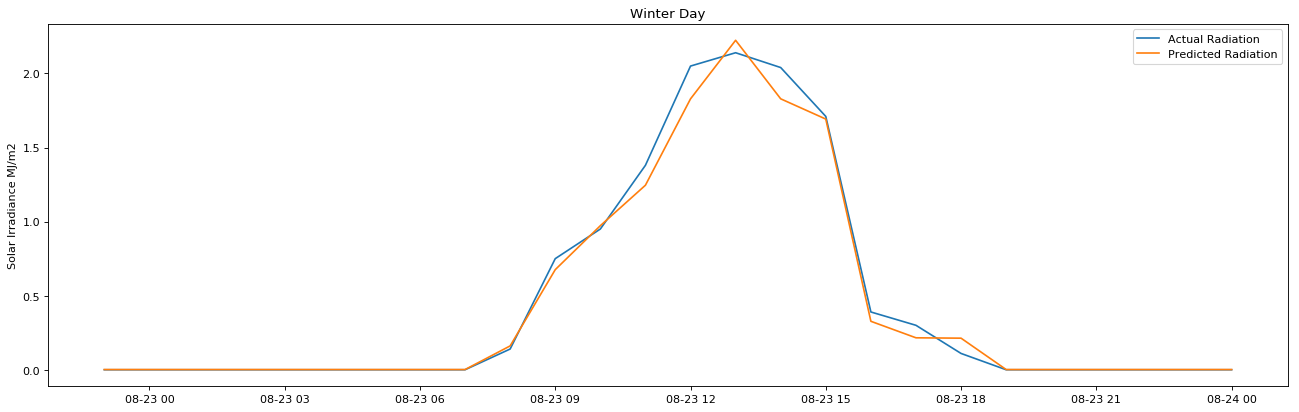

In [31]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tmep,temp1, label='Actual Radiation')
plt.plot(tmep,temp, label='Predicted Radiation')
# plt.xlabel('Date-Time(mm-dd hh)')
plt.ylabel('Solar Irradiance MJ/m2')
plt.title('Winter Day')
plt.legend()
# plt.savefig('Nelson_Hourly_Winter.png', dpi=1000)
# files.download('Nelson_Hourly_Winter.png')  



In [32]:
# Visualization of the Predicted vs True Values Vs Date and Time
Summer_day=combinedTraintest.Datetime.loc[17519:]
print(Summer_day.shape)
Summer_day_AC=combinedTraintest.Actual_Radiation.loc[17519:]
print(Summer_day_AC.shape)
Summer_day_PR=combinedTraintest.Predicted_Radiation.loc[17519:]
print(Summer_day_PR.shape)

(26,)
(26,)
(26,)


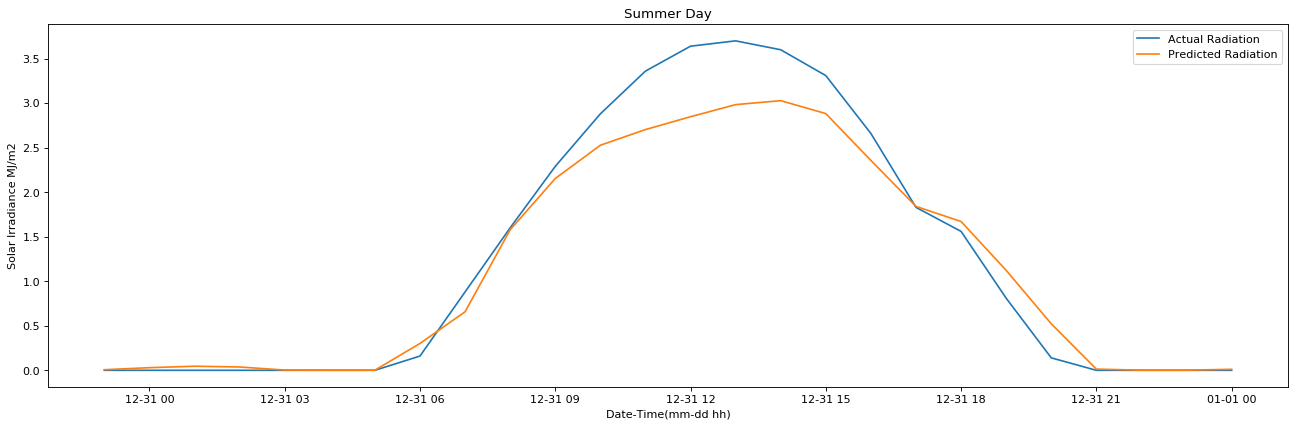

In [33]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Summer_day,Summer_day_AC, label='Actual Radiation')
plt.plot(Summer_day,Summer_day_PR, label='Predicted Radiation')
plt.xlabel('Date-Time(mm-dd hh)')
plt.ylabel('Solar Irradiance MJ/m2')
plt.title('Summer Day')
plt.legend()
# plt.savefig('Nelson_Hourly_Summer.png', dpi=1000)
# files.download('Nelson_Hourly_Summer.png')  


In [34]:
# Performance measures RMSE,R,R2 and MAE
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import scipy
from scipy.stats.stats import pearsonr

rms = sqrt(mean_squared_error(combinedTraintest['Actual_Radiation'], combinedTraintest['Predicted_Radiation']))
rms

0.23242903064810777

In [35]:
from scipy import stats 
slope, intercept, r_value, p_value, std_err = stats.linregress(combinedTraintest['Actual_Radiation'], combinedTraintest['Predicted_Radiation'])
r_value


0.9687098972261717

In [36]:
r_value**2

0.9383988649839402

In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(combinedTraintest['Actual_Radiation'], combinedTraintest['Predicted_Radiation'])


0.12393853869229718